## Import Libraries 

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [31]:
data = pd.read_csv('Datasets/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', usecols=['name', 'asins', 'reviews.rating', 'reviews.username'], encoding='utf8')
data.columns = ['product_name', 'product_id', 'rating', 'user']
data

,product_name,product_id,rating,user
0,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",3,Byger yang
1,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",4,ByMG
2,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",5,BySharon Lambert
3,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",5,Bymark sexson
4,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",5,Bylinda
...,...,...,...,...
28327,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,5,Mom2twinsplus1
28328,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,4,fireman21
28329,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,5,suzannalicious
28330,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,5,SandyJ


## Data Statistics

### Handling Missing Data

In [32]:
print('Number of missing values across columns: \n', data.isnull().sum())

data = data.dropna()
print('\nNumber of missing values across columns: \n', data.isnull().sum())

Number of missing values across columns: 
 product_name    0
product_id      0
rating          0
user            5
dtype: int64

Number of missing values across columns: 
 product_name    0
product_id      0
rating          0
user            0
dtype: int64


### Statistics

In [33]:
print(f"Total no of ratings: {data.shape[0]}")
print(f"Total No of Users: {len(pd.unique(data.user))}")
print(f"Total No of products: {len(pd.unique(data.product_id))}")

Total no of ratings: 28327
Total No of Users: 16268
Total No of products: 65


In [34]:
data.describe()['rating'].T


count    28327.000000
mean         4.514068
std          0.934903
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

## Ratings Summary

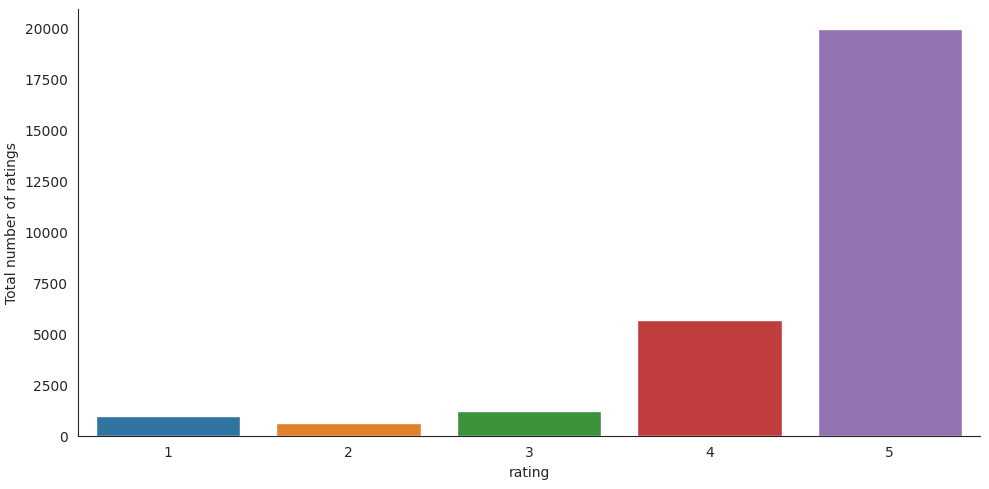

In [35]:
with sns.axes_style('white'):
    g = sns.catplot(x="rating", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## Popularity Based Recommendation System

In [36]:
new_df = data.groupby("product_id").filter(lambda x:x['rating'].count() >=50)

### Sorting By Mean Ratings

In [37]:
new_df.groupby('product_id')['rating'].mean().sort_values(ascending=False).head(10)
mean_ratings_df = pd.DataFrame(new_df.groupby('product_id')['rating'].mean().sort_values(ascending=False).head(10))
mean_ratings_df

,rating
product_id,
B00IOY8XWQ,4.726733
B01J94SCAM,4.641638
B01J94SBEY,4.630901
B00VINDBJK,4.629630
B00REQKWGA,4.618182
B00ZS0G0PG,4.612903
B01J94SWWU,4.607692
B01J94T1Z2,4.600000
B018T075DC,4.597052


### Sorting By Number Of Ratings

In [38]:
new_df.groupby('product_id')['rating'].count().sort_values(ascending=False).head()
ratings_mean_count = pd.DataFrame(new_df.groupby('product_id')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('product_id')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
product_id,,
B00IOY8XWQ,4.726733,505
"B00QWO9P0O,B00LH3DMUO",4.448040,8343
"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",4.453594,3728
B00REQKWGA,4.618182,55
B00VINDBJK,4.629630,54


### Most Popular Items Using Number Of Ratings

In [39]:
new_df.groupby('product_id')['rating'].count()
popular_products = pd.DataFrame(new_df.groupby('product_id')['rating'].count())
most_popular = pd.DataFrame(popular_products.sort_values('rating', ascending=False))
most_popular.head()

,rating
product_id,
"B00QWO9P0O,B00LH3DMUO",8343
"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",3728
B018T075DC,2442
"B018SZT3BK,B01AHB9CN2",2369
B018Y226XO,1675


### Mapping Product IDs to Product Names

In [40]:
mapping_df = data[["product_id", "product_name"]]
mapping_df = mapping_df.drop_duplicates(keep='first')
most_popular = pd.merge(most_popular, mapping_df[["product_id", "product_name"]], on="product_id", how="inner")
most_popular.head()

,product_id,rating,product_name
0,"B00QWO9P0O,B00LH3DMUO",8343,AmazonBasics AAA Performance Alkaline Batterie...
1,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",3728,AmazonBasics AA Performance Alkaline Batteries...
2,B018T075DC,2442,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ..."
3,"B018SZT3BK,B01AHB9CN2",2369,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
4,B018Y226XO,1675,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16..."


### Bar Graph of Most Popular Products

<Axes: xlabel='product_name'>

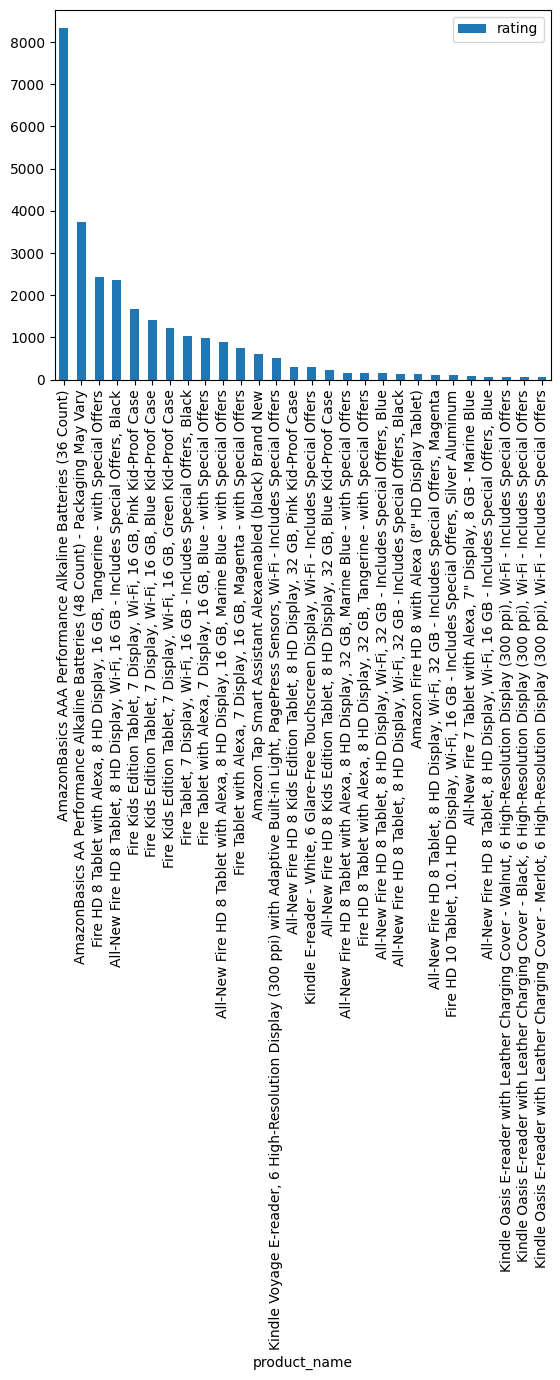

In [41]:
most_popular.plot(kind = "bar", x="product_name", y="rating")

### Most Popular Items List

In [42]:
most_popular

,product_id,rating,product_name
0,"B00QWO9P0O,B00LH3DMUO",8343,AmazonBasics AAA Performance Alkaline Batterie...
1,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",3728,AmazonBasics AA Performance Alkaline Batteries...
2,B018T075DC,2442,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ..."
3,"B018SZT3BK,B01AHB9CN2",2369,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
4,B018Y226XO,1675,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16..."
5,B018Y22C2Y,1424,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16..."
6,B018Y23MNM,1211,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16..."
7,B018Y22BI4,1024,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include..."
8,B018Y225IA,987,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue..."
9,B01J94YIT6,883,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp..."


### Saving the Results

In [43]:
most_popular.to_csv('./Outputs/Most Popular Products.csv')